<a href="https://colab.research.google.com/github/nastaran-farhadi/Machine-learning-practice/blob/main/NLP%20in%20portuguese%20review%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount on Google Colab:Using Google Colab's drive module to mount Google Drive at the directory content/gdrive'.**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


**Importing library:**importing several libraries commonly used for data manipulation, numerical computation, data visualization, and natural language processing (NLP)

In [ ]:
#import laibraries
import pandas as pd # for data manipulation
import numpy as np # for numerical computation
import matplotlib.pyplot as plt # for data visualization
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist

import seaborn as sns
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.cluster import KMeans
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency

In [ ]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = stopwords.words("portuguese")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Reading the dataset and exploring the data**

In [ ]:
#Load the data from the JSON file
ideas = pd.read_json('/content/gdrive/MyDrive/Innovationcast/ideas.json')
comments = pd.read_json('/content/gdrive/MyDrive/Innovationcast/comments.json')

In [ ]:
ideas.shape

(110, 37)

In [ ]:
comments.shape

(876, 19)

In [ ]:
ideas.head()

,id,formattedId,title,description,customFields,summary,authorId,authorDto,contributorIds,directionality,...,duplicatedEntitiesIds,originalEntitiesIds,coAuthors,resubmissionCount,resubmittedIdeasIds,relatedIdeaIds,relatedIdeas,parentRelatedIdeaIds,parentRelatedIdeas,links
0,97,i-097,Envolver as ordens profissionais nesta facilit...,<p>Poderíamos envolver a ordem dos médicos e a...,[],Ordem dos médicos e Ordem dos enfermeiros ajud...,327,"{'profileUrl': '/user/home/327', 'id': 327, 'u...","[412, 640]",ltr,...,[],[],[],0,[],[],[],[],[],"[{'name': 'get', 'url': '/api/ideation/ideas/9..."
1,100,i-100,Site de Bem-estar,<p>Há muitas pessoas sozinhas em casa que não ...,[],"A informação de como passar bem o tempo, de no...",226,"{'profileUrl': '/user/home/226', 'id': 226, 'u...",[554],ltr,...,[],[],[],0,[],[],[],[],[],"[{'name': 'get', 'url': '/api/ideation/ideas/1..."
2,101,i-101,Hotel para apoiar profissionais de saúde,<p>Vários profissionais vão estar muito pressi...,[],Oferecer acomodação aos profissionais de saúde...,456,"{'profileUrl': '/user/home/456', 'id': 456, 'u...",[],ltr,...,[],[],[],0,[],[],[],[],[],"[{'name': 'get', 'url': '/api/ideation/ideas/1..."
3,102,i-102,Proximidade Senior - SNS24,"<p>O SNS24, tem uma campanha de OutBound (alti...",[],Proximidade Senior - SNS24 - Comunicar com os ...,427,"{'profileUrl': '/user/home/427', 'id': 427, 'u...","[492, 640]",ltr,...,[],[],[],0,[],[],[],[],[],"[{'name': 'get', 'url': '/api/ideation/ideas/1..."
4,129,i-129,Retribuir Saúde,"<p class=""font_8""><span>Somos parte de um todo...",[],Retribuir Saúde. Consultas online GRATUITAS co...,494,"{'profileUrl': '/user/home/494', 'id': 494, 'u...","[554, 35, 407, 427]",ltr,...,[],[],[],0,[],[],[],[],[],"[{'name': 'get', 'url': '/api/ideation/ideas/1..."


In [ ]:
comments.head()

,id,entityId,entityType,spaceId,authorId,body,dir,authorDto,fileAttachmentsUrls,createdOn,updatedOn,moderationState,isSignificantContribution,isPrivate,significantContributionJustification,mentions,replyCount,version,editCount
0,97,65,ideas,1,35,"Esta ideia é interessante, mas gostava de perc...",ltr,"{'profileUrl': '/user/home/35', 'id': 35, 'use...",[],2020-03-17T07:22:11.3958154+00:00,2023-11-13T00:38:11.7675410+00:00,"{'description': 'Desconhecido', 'id': 'Unknown...",False,False,"{'body': '', 'dir': 'ltr'}",{},0,0,0
1,98,65,ideas,1,163,É importante não tornar a implementaçao depend...,ltr,"{'profileUrl': '/user/home/163', 'id': 163, 'u...",[],2020-03-17T08:14:19.8428361+00:00,2023-11-13T00:38:11.7675410+00:00,"{'description': 'Aprovado', 'id': 'Approved', ...",False,False,"{'body': '', 'dir': 'ltr'}",{},0,0,0
2,99,65,ideas,1,392,"Ideia excelente. Aliás, já está parcialmente e...",ltr,"{'profileUrl': '/user/home/392', 'id': 392, 'u...",[],2020-03-17T08:17:52.6681416+00:00,2023-11-13T00:38:11.7675410+00:00,"{'description': 'Desconhecido', 'id': 'Unknown...",False,False,"{'body': '', 'dir': 'ltr'}",{},0,0,0
3,100,65,ideas,1,398,"Excelente ideia! Do mesmo modo, a prevenção e ...",ltr,"{'profileUrl': '/user/home/398', 'id': 398, 'u...",[],2020-03-17T08:42:21.8674045+00:00,2023-11-13T00:38:11.7675410+00:00,"{'description': 'Aprovado', 'id': 'Approved', ...",False,False,"{'body': '', 'dir': 'ltr'}",{},0,0,0
4,101,98,ideas,1,35,"Eu gosto da ideia, mas estou indeciso porque n...",ltr,"{'profileUrl': '/user/home/35', 'id': 35, 'use...",[],2020-03-17T09:30:20.2615908+00:00,2023-11-13T00:38:11.7675410+00:00,"{'description': 'Desconhecido', 'id': 'Unknown...",False,False,"{'body': '', 'dir': 'ltr'}",{},0,0,0


In [ ]:
ideas.describe()

,id,authorId,spaceId,version,resubmissionCount
count,110.000000,110.000000,110.0,110.000000,110.0
mean,416.554545,916.154545,1.0,1.134545,0.0
std,239.680199,473.422541,0.0,0.315192,0.0
min,97.000000,35.000000,1.0,1.000000,0.0
25%,237.750000,570.000000,1.0,1.000000,0.0
50%,374.500000,906.500000,1.0,1.000000,0.0
75%,514.500000,1129.500000,1.0,1.100000,0.0
max,1121.000000,2305.000000,1.0,2.600000,0.0


In [ ]:
comments.describe()

,id,entityId,spaceId,authorId,replyCount,version,editCount
count,876.000000,876.000000,876.0,876.000000,876.0,876.0,876.0
mean,1002.897260,354.505708,1.0,761.302511,0.0,0.0,0.0
std,508.661761,187.136201,0.0,478.924305,0.0,0.0,0.0
min,97.000000,33.000000,1.0,33.000000,0.0,0.0,0.0
25%,645.750000,227.000000,1.0,427.000000,0.0,0.0,0.0
50%,923.500000,321.000000,1.0,673.000000,0.0,0.0,0.0
75%,1319.250000,456.000000,1.0,1030.000000,0.0,0.0,0.0
max,2437.000000,1089.000000,1.0,2497.000000,0.0,0.0,0.0


In [ ]:
ideas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           110 non-null    int64  
 1   formattedId                  110 non-null    object 
 2   title                        110 non-null    object 
 3   description                  110 non-null    object 
 4   customFields                 110 non-null    object 
 5   summary                      110 non-null    object 
 6   authorId                     110 non-null    int64  
 7   authorDto                    110 non-null    object 
 8   contributorIds               110 non-null    object 
 9   directionality               110 non-null    object 
 10  tags                         110 non-null    object 
 11  isDeleted                    110 non-null    bool   
 12  spaceId                      110 non-null    int64  
 13  container           

In [ ]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   id                                    876 non-null    int64 
 1   entityId                              876 non-null    int64 
 2   entityType                            876 non-null    object
 3   spaceId                               876 non-null    int64 
 4   authorId                              876 non-null    int64 
 5   body                                  876 non-null    object
 6   dir                                   876 non-null    object
 7   authorDto                             876 non-null    object
 8   fileAttachmentsUrls                   876 non-null    object
 9   createdOn                             876 non-null    object
 10  updatedOn                             876 non-null    object
 11  moderationState                 

Exploring the unique IDs between datasets and finding the common join key

In [ ]:
value_counts = comments['entityId'].value_counts()
idea_value_counts = ideas['id'].value_counts()


In [ ]:
value_counts.head()

456    30
311    25
299    20
100    18
98     18
Name: entityId, dtype: int64

**Tokenizing and cleaning the text columns in both datasets**

In [ ]:
ideas['title'] = ideas['title'].astype(str).str.lower()
ideas['description'] = ideas['description'].astype(str).str.lower()
ideas['summary'] = ideas['summary'].astype(str).str.lower()

comments['body'] = comments['body'].astype(str).str.lower()


In [ ]:
regexp = RegexpTokenizer('\w+')

ideas['title_token']=ideas['title'].apply(regexp.tokenize)
ideas['description_token'] = ideas['description'].apply(regexp.tokenize)
ideas['summary_token'] = ideas['summary'].apply(regexp.tokenize)
comments['body'] = comments['body'].apply(regexp.tokenize)


In [ ]:
ideas['title_token'] = ideas['title_token'].apply(lambda x: [item for item in x if item not in stopwords])
ideas['description_token'] = ideas['description_token'].apply(lambda x: [item for item in x if item not in stopwords])
ideas['summary_token'] = ideas['summary_token'].apply(lambda x: [item for item in x if item not in stopwords])
comments['body'] = comments['body'].apply(lambda x: [item for item in x if item not in stopwords])


*Combining all text columns in ideas table*

In [ ]:
ideas['combined_text'] = ideas['title_token'] + ideas['description_token'] + ideas['summary_token']


*There are so many dirty data in the comments table including image ids, numbers, etc. That is why we limit the lenght of words and make sure to remove numbers*

In [ ]:
ideas['combined_text_string'] = ideas['combined_text'].apply(lambda x: ' '.join([item for item in x if len(item)>5]))
comments['body_string'] =  comments['body'].apply(lambda x: ' '.join([item for item in x if (len(item)<20 and len(item)>5 and item.isalpha())]))

**Drawing word cloud using word frequencies**

In [ ]:
all_words = ' '.join([word for word in ideas['combined_text_string']])

tokenized_words = nltk.tokenize.word_tokenize(all_words)
fdist = FreqDist(tokenized_words)
ideas['text_string_fdist'] = ideas['combined_text'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))




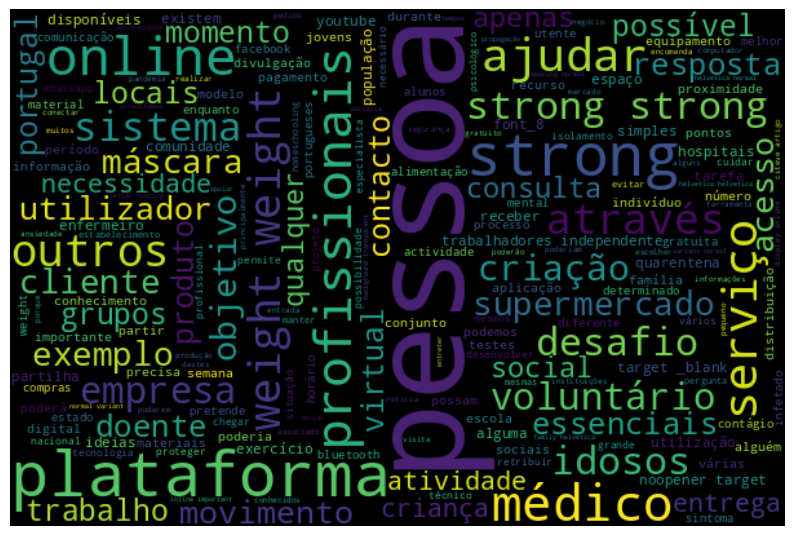

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

**Using textblob for sentiment analysis since the language is in portugese. Vader only works for English**

In [ ]:
from textblob import TextBlob
def sentiment_analysis(table,column, return_column ):
 def getSubjectivity(text):
   analysis = TextBlob(text)
    # Translate to English for polarity analysis
   analysis_en = analysis.translate(from_lang='pt', to='en')
   return analysis_en.sentiment.subjectivity

 #Create a function to get the polarity
 def getPolarity(text):
   analysis = TextBlob(text)
    # Translate to English for polarity analysis
   analysis_en = analysis.translate(from_lang='pt', to='en')
   return analysis_en.sentiment.polarity

 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 table['TextBlob_Subjectivity'] =  table[column].apply(getSubjectivity)
 table ['TextBlob_Polarity'] = table[column].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 table [return_column] = table['TextBlob_Polarity'].apply(getAnalysis)
 return table

# Apply sentiment analysis function to 'ideas' column


In [ ]:
ideas = sentiment_analysis(ideas,'combined_text_string', 'TextBlobAnalysis' )

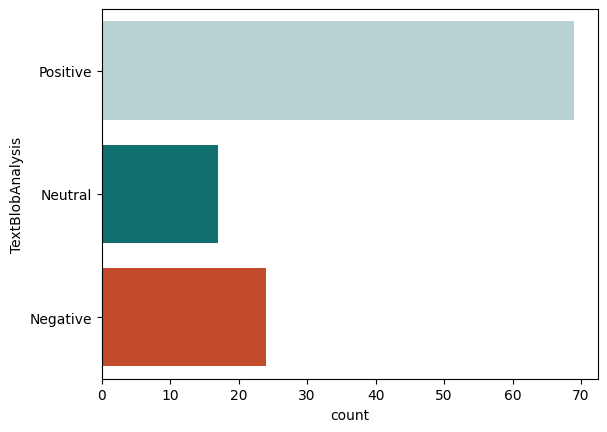

In [ ]:

sns.countplot(y='TextBlobAnalysis',
             data=ideas
              ,
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

**Trying another classification method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 0, 'PCA Component 1')

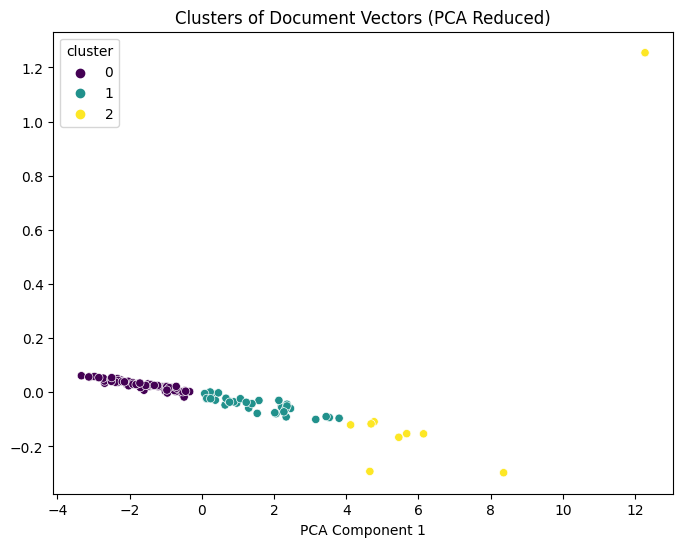

In [ ]:


# Load your DataFrame containing the 'ideas' column
# Assuming your DataFrame is named 'df'

# Preprocess the text data
ideas['combined_text_string'] = ideas['combined_text_string'].astype(str)  # Convert to string if necessary

# Tokenize and preprocess the text
tokenized_data = ideas['combined_text_string'].apply(word_tokenize)

# Create TaggedDocument for Doc2Vec
tagged_data = [TaggedDocument(words=word_tokenize(text.lower()), tags=[str(i)]) for i, text in enumerate(ideas['combined_text_string'])]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Get document vectors
document_vectors = [doc2vec_model.infer_vector(words) for words in tokenized_data]

# Cluster the document vectors using KMeans
pca = PCA(n_components=2)
pca_result = pca.fit_transform(document_vectors)

# Cluster the document vectors using KMeans
num_clusters = 3  # Assuming 3 clusters for positive and negative and neutral sentiments
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_model.fit(document_vectors)

# Add cluster labels to the DataFrame
ideas['cluster'] = kmeans_model.labels_

# Visualize the clusters in 2D using PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=ideas['cluster'], palette='viridis', legend='full')
plt.title('Clusters of Document Vectors (PCA Reduced)')
plt.xlabel('PCA Component 1')


Cramer's V value: 0.28830681469225333


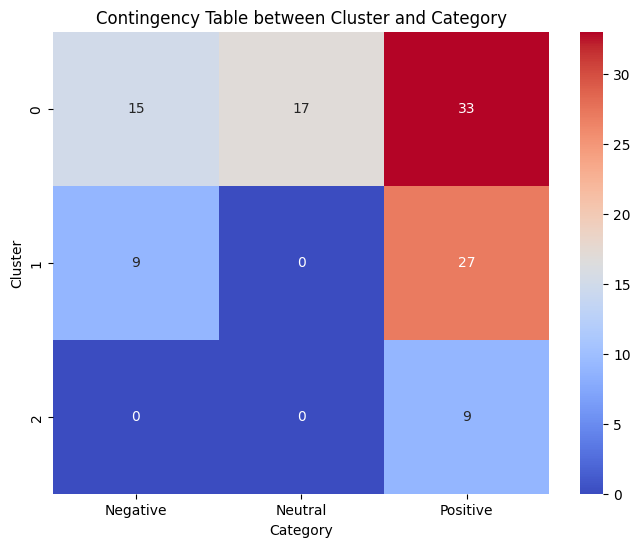

In [ ]:

contingency_table = pd.crosstab(ideas['cluster'], ideas['TextBlobAnalysis'])

# Perform Chi-Square test to calculate the p-value and expected frequencies
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramer's V
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min((r - 1), (k - 1)))

print(f"Cramer's V value: {cramers_v}")

# Visualize the contingency table (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Contingency Table between Cluster and Category')
plt.xlabel('Category')
plt.ylabel('Cluster')
plt.show()

**Part 2 Problem 1**

In [ ]:
merged_ideas_comments = pd.merge(ideas, comments, left_on='id', right_on='entityId', how='left')


*Making sure the join is not removing needed data*

In [ ]:
filtered_df = comments[comments['entityType'] == 'ideas']

distinct_values = filtered_df['entityId'].unique()
distinct_values
print(distinct_values.size)

136


In [ ]:
distinct_values = ideas['id'].unique()
distinct_values
print(distinct_values.size)

110


In [ ]:
merged_ideas_comments = merged_ideas_comments[['id_x', 'entityId', 'entityType', 'combined_text_string', 'body_string', 'TextBlobAnalysis']]

In [ ]:
merged_ideas_comments = merged_ideas_comments[merged_ideas_comments['entityType'] == 'ideas']

In [ ]:
merged_ideas_comments = merged_ideas_comments[merged_ideas_comments['body_string'] != ""]

In [ ]:

merged_ideas_comments = sentiment_analysis(merged_ideas_comments, 'body_string', 'TextBlob_Analysis_comments')

Cramer's V value: 0.062279820191068716


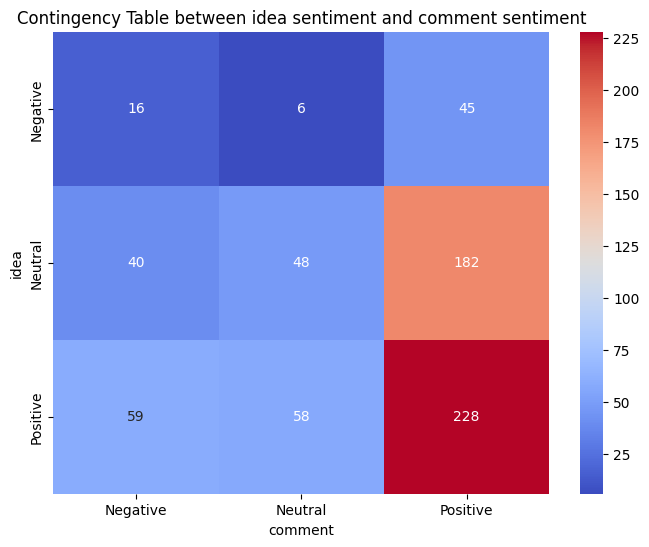

In [ ]:

contingency_table = pd.crosstab(merged_ideas_comments['TextBlob_Analysis_comments'], merged_ideas_comments['TextBlobAnalysis'])

# Perform Chi-Square test to calculate the p-value and expected frequencies
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramer's V
n = contingency_table.sum().sum()
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min((r - 1), (k - 1)))

print(f"Cramer's V value: {cramers_v}")

# Visualize the contingency table (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Contingency Table between idea sentiment and comment sentiment')
plt.xlabel('comment')
plt.ylabel('idea')
plt.show()

In [ ]:
merged_ideas_comments.groupby('id_x')['TextBlob_Analysis_comments'].value_counts()



id_x  TextBlob_Analysis_comments
97    Neutral                        3
      Positive                       3
      Negative                       2
100   Neutral                       11
      Positive                       7
                                    ..
865   Positive                       1
929   Neutral                        9
      Positive                       6
962   Neutral                        2
1089  Positive                       1
Name: TextBlob_Analysis_comments, Length: 216, dtype: int64

**Document classification**

In [ ]:
from gensim import models
from gensim.corpora import Dictionary

# Example seed words for specific topics in Portuguese
topic_seeds = {
    'products': ['produto', 'mercadoria', 'item'],
    'services': ['serviço', 'assistência', 'prestação'],
    'business_models': ['modelo de negócio', 'estratégia empresarial', 'plano de negócio'],
    'changing_work_practices': ['mudança no trabalho', 'nova prática laboral', 'transformação de trabalho'],
    'marketing': ['marketing', 'promoção', 'publicidade'],
    'cost_savings': ['economia de custos', 'corte de despesas', 'redução de gastos']
}

# Assuming 'df' contains your preprocessed text in 'Processed_Text' column

# Convert seed words into a list of strings for each topic
seed_word_lists = [topic_seeds[topic] for topic in topic_seeds]

# Vectorization using TF-IDF
# Replace this part with your own vectorization method if needed
dictionary = Dictionary(ideas['combined_text'])
corpus = [dictionary.doc2bow(doc) for doc in ideas['combined_text']]

seed_word_lists = [topic_seeds[topic] for topic in topic_seeds]


eta = [[0.01] * len(dictionary)] * len(topic_seeds)

# Initialize topics using seed words dictionary
lda_model = models.LdaModel(corpus, num_topics=len(topic_seeds), id2word=dictionary, passes=15,
                            alpha='auto', eta=eta, iterations=400,
                            random_state=42, eval_every=None,
                            per_word_topics=True)

# Assign topics to each row in the DataFrame
topic_assignments = []
for i, row in ideas.iterrows():
    doc_bow = dictionary.doc2bow(row['combined_text'])
    topics = lda_model.get_document_topics(doc_bow)
    dominant_topic = max(topics, key=lambda x: x[1])[0]
    topic_assignments.append(dominant_topic)

ideas['Topic_Assignment'] = topic_assignments

# Print topics and their top words
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.066*"span" + 0.053*"p" + 0.028*"font" + 0.023*"style" + 0.020*"400" + 0.020*"weight" + 0.017*"li" + 0.013*"strong" + 0.011*"br" + 0.010*"quot"
Topic 1: 0.057*"p" + 0.016*"casa" + 0.011*"fazer" + 0.010*"locais" + 0.009*"pessoas" + 0.008*"quot" + 0.008*"li" + 0.008*"aulas" + 0.007*"utilizador" + 0.006*"br"
Topic 2: 0.031*"p" + 0.023*"li" + 0.015*"br" + 0.015*"pessoas" + 0.011*"span" + 0.010*"todos" + 0.008*"trabalhadores" + 0.008*"independentes" + 0.007*"consultas" + 0.007*"através"
Topic 3: 0.078*"p" + 0.015*"https" + 0.012*"pessoas" + 0.010*"covid" + 0.009*"href" + 0.008*"plataforma" + 0.008*"onde" + 0.007*"fazer" + 0.007*"online" + 0.005*"ter"
Topic 4: 0.020*"br" + 0.018*"p" + 0.016*"epis" + 0.014*"alimentação" + 0.009*"idosos" + 0.009*"todos" + 0.009*"bem" + 0.007*"casa" + 0.007*"actividade" + 0.007*"lares"
Topic 5: 0.080*"p" + 0.021*"strong" + 0.016*"span" + 0.012*"nbsp" + 0.011*"li" + 0.010*"https" + 0.009*"saúde" + 0.008*"class" + 0.007*"www" + 0.007*"máscaras"


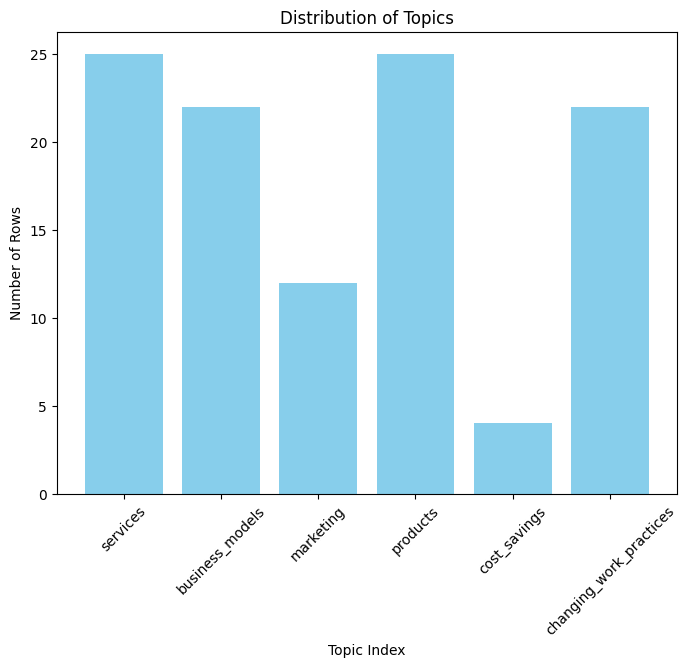

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' contains the DataFrame with 'Topic_Assignment' column

# Count the occurrences of each topic
topic_counts = ideas['Topic_Assignment'].value_counts()

# Plotting the distribution of topics
plt.figure(figsize=(8, 6))
plt.bar(topic_counts.index, topic_counts.values, color='skyblue')
plt.xlabel('Topic Index')
plt.ylabel('Number of Rows')
plt.title('Distribution of Topics')
#plt.xticks(topic_counts.index)
topic_names = ['products','services','business_models','changing_work_practices','marketing','cost_savings']
plt.xticks(topic_counts.index, topic_names,rotation=45)
plt.show()